In [1]:
# Main Imports

import nilearn

from nilearn.image import resample_to_img

import pylab as plt

import numpy as np
import nibabel as nb
import os
import glob
import random
import pandas as pd
import re

import seaborn as sns #added
sns.set(style="darkgrid") #added

from nilearn.image import mean_img #added
from nilearn.plotting import plot_anat #added

In [2]:
# Local directory where the Data are mounted
rootDirectory = "/data/RMN/LUCA_PASQUINI"

# Local subdirectory where dataset is mounted
dataDir = "DATI_SEGMENTATI_SCALATI_media"

# Dataset dir
datasetDir = f"{rootDirectory}/{dataDir}"

#CSV fileroot 
fileName = f"{rootDirectory}/{dataDir}/Array_Labels_Def.csv"

In [3]:
ls {datasetDir}/ANGELONI_GIUSEPPINA

ADC_registered.nii*       FLAIRscalatamedia.nii*      T1_registered.nii*
ADC_registered.nii.gz*    MPRAGEMDC_registered.nii*   T1_registered.nii.gz*
ADCscalatamedia.nii*      MPRAGEMDCscalatamedia.nii*  T1scalatamedia.nii*
FLAIR_registered.nii*     ROI/                        file-list.txt*
FLAIR_registered.nii.gz*  T1MDC_registered.nii*
FLAIR_registered_.nii*    T1MDC_registered.nii.gz*


In [12]:
# mask: f"{datasetDir}/{Path}/ROI/{MaskPath}.nii.gz"
# sequence: f"{datasetDir}/{Path}/{SEQUENCE_1}.nii"
def BrainBox(Mask_file, Sequence_file):
    
    mask_data = nb.load(Mask_file)
    Mask = np.asarray(mask_data.dataobj)
    
    r = np.any(Mask, axis=(1, 2))
    c = np.any(Mask, axis=(0, 2))
    z = np.any(Mask, axis=(0, 1))

    rmin, rmax = np.where(r)[0][[0, -1]]
    cmin, cmax = np.where(c)[0][[0, -1]]
    zmin, zmax = np.where(z)[0][[0, -1]]
    
    #f"{Path}"
    #for i in range(3):
    #    if Mask.shape[i]==Sequence.shape[i] :
    #    print("All Elements in List are Equal")
    #else:        
    #    print(f"All Elements in {Path} are Not Equal")
    
    delta_r=rmax-rmin
    delta_c=cmax-cmin
    delta_z=zmax-zmin
    delta_max=np.amax([delta_r,delta_c,delta_z])
    
    # Load bounding boxed image
    sequence_data = nb.load(Sequence_file)
    
    # Apply bounding box
    return sequence_data.dataobj[(rmin):((rmin)+delta_max),(cmin):((cmin)+delta_max),(zmin):((zmin)+delta_max)]
    
    # Sequence=np.asarray(sequence_data.get_fdata())
    # Dim=[Sequence.shape]

    # BrainBox_Sequence=Sequence[(rmin):((rmin)+delta_max),(cmin):((cmin)+delta_max),(zmin):((zmin)+delta_max)]
    # return BrainBox_Sequence

In [13]:
def ReboundMask(Seq_mask_conv):
    r = np.any(Seq_mask_conv, axis=(1, 2))
    c = np.any(Seq_mask_conv, axis=(0, 2))
    z = np.any(Seq_mask_conv, axis=(0, 1))

    rmin, rmax = np.where(r)[0][[0, -1]]
    cmin, cmax = np.where(c)[0][[0, -1]]
    zmin, zmax = np.where(z)[0][[0, -1]]
    
    delta_r=rmax-rmin
    delta_c=cmax-cmin
    delta_z=zmax-zmin
    
    delta_max=np.amax([delta_r,delta_c,delta_z])
    
    Rebounded_Sequence=Seq_mask_conv[rmin:(rmin+delta_max),cmin:(cmin+delta_max),zmin:(zmin+delta_max)]
    
    return Rebounded_Sequence

In [80]:
#ROI = nb.load(f"{datasetDir}/STAN_FLORENTINA/ROI/T2ROI.nii")
#Mask= np.asarray(ROI.dataobj)
#Mask.shape

(192, 256, 160)

# Slice reduction

In [150]:
def PercentileSlicer(sequence,mask,brain_box,length,percentile,affine):
    
    sequence_mask=sequence.dataobj*mask.dataobj
    for i in range(length):
        seq_sizes=np.sum(sequence_mask,axis=(0,1))
        non_empty_sizes = seq_sizes[np.where(seq_sizes > 0)]
        percentile_val = np.percentile(non_empty_sizes, percentile)
    
    return np.where(seq_sizes > percentile_val)[0]

In [151]:
brain_box_reduced=PercentileSlicer(New,brain_box,l,percentile,affine)

In [154]:
np.moveaxis(brain_box_reduced, 0, -1)

array([[[432.4069  , 460.0173  , 481.95547 , ...,  94.716965,
          89.32126 ,  82.525826],
        [492.6323  , 509.026   , 518.18207 , ..., 105.88076 ,
         102.39302 ,  98.527725],
        [529.8063  , 536.49023 , 541.7021  , ..., 143.44983 ,
         129.22789 , 119.46748 ],
        ...,
        [235.50658 , 239.39241 , 238.30284 , ..., 143.46164 ,
         125.97676 , 107.22787 ],
        [211.57124 , 213.37946 , 216.73242 , ..., 136.66301 ,
         124.26907 , 107.74787 ],
        [203.69948 , 197.7995  , 195.67946 , ..., 103.137344,
         102.70636 ,  96.648575]],

       [[517.6721  , 524.4181  , 529.85    , ..., 154.10512 ,
         145.37492 , 134.14691 ],
        [544.3597  , 549.15173 , 557.12274 , ..., 193.48376 ,
         188.12306 , 177.0203  ],
        [594.3192  , 603.3667  , 613.599   , ..., 241.86284 ,
         228.84155 , 214.78131 ],
        ...,
        [253.41873 , 261.8746  , 248.74696 , ..., 172.73837 ,
         150.8381  , 129.11935 ],
        [228

In [82]:
percentile=65
for i in range(len(Obj[0][1])):
    seq_sizes=np.sum(New,axis=(0,1))
    non_empty_sizes = seq_sizes[np.where(seq_sizes > 0)]
    percentile_val = np.percentile(non_empty_sizes, percentile)
    seq_indexes = np.where(seq_sizes > percentile_val)[0]

In [155]:
brain_box_reduced.shape

(32, 92, 92)

In [143]:
print(seq_indexes)
IMG_DATA_RED=np.asarray([DATA[k,:,:] for k in seq_indexes])


[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61]


In [99]:
import nibabel
img = nibabel.Nifti1Image(IMG_DATA_RED, affine=IMG_reg.affine)

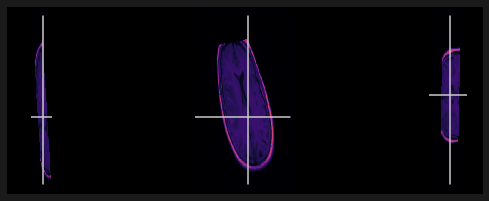

In [100]:
plot_anat(img, cmap='magma', colorbar=False, display_mode='', annotate=False);

In [74]:
percentile=20
roi_data = ROI.get_fdata()
roi_shaped = resample_to_img(ROI, IMG_reg, interpolation='nearest')
roi_shaped_data = roi_shaped.get_fdata()
roi_sizes = np.sum(roi_shaped_data, axis=(0, 1))
non_empty_sizes = roi_sizes[np.where(roi_sizes > 0)]
percentile_val = np.percentile(non_empty_sizes, percentile)
roi_indexes = np.where(roi_sizes > percentile_val)[0]


In [75]:
print(roi_indexes)

[ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37]


In [76]:
DATA_RED=np.asarray([DATA[:,:,k] for k in roi_indexes])

    
    

In [77]:
# We need to turn this data into a nibabel image
import nibabel
img = nibabel.Nifti1Image(DATA_RED, affine=IMG_reg.affine)

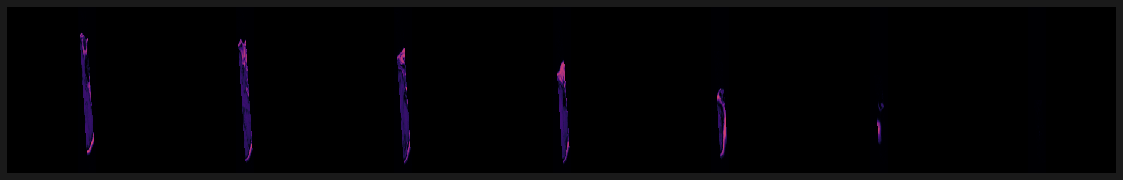

In [79]:
plot_anat(img, cmap='magma', colorbar=False, display_mode='y', annotate=False);

In [ ]:
roi = s.get_roi(mask)
roi_shaped = resample_to_img(roi, t1_orig, interpolation='nearest')
roi_shaped_data = roi_shaped.get_fdata()
roi_sizes = np.sum(roi_shaped_data, axis=(0, 1))
non_empty_sizes = roi_sizes[np.where(roi_sizes > 0)]
percentile_val = np.percentile(non_empty_sizes, percentile)
roi_indexes = np.where(roi_sizes > percentile_val)[0]

In [18]:
IMG_reg.affine

array([[-9.61742818e-01, -4.13307243e-05, -1.73545063e-01,
         9.74129257e+01],
       [ 5.28746881e-02,  9.27749932e-01, -3.07457656e-01,
        -1.06144562e+02],
       [-1.61025882e-01,  3.04884136e-01,  9.35557604e-01,
        -7.12708206e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [21]:
np.count_nonzero(Mask)

181343

In [22]:
np.count_nonzero(New)

181342

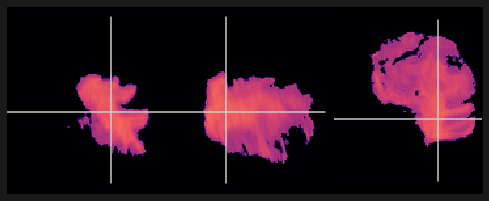

In [24]:
plot_anat(B, cmap='magma', colorbar=False, display_mode='ortho', annotate=False);

In [85]:
source_affine = IMG_reg.affine
#source_affine[:2, 3] = np.array([96, 64])

source_affine

array([[-9.75928724e-01, -3.41727573e-05, -3.60212810e-02,
         9.72776947e+01],
       [ 9.11666732e-03,  9.42952216e-01, -2.59919286e-01,
        -7.12850876e+01],
       [-3.39762643e-02,  2.53998816e-01,  9.64926600e-01,
        -1.17044640e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [96]:
# Rotate it slightly
angle = np.pi / 180 * 60
rotation_matrix = np.array([[-np.cos(angle), np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
#source_affine_transformed= rotation_matrix* source_affine[:2, :2]  
#source_affine_transformed

In [97]:
source_affine[:2, :2] =rotation_matrix
source_affine

array([[-5.00000000e-01,  8.66025404e-01, -3.60212810e-02,
         9.72776947e+01],
       [ 8.66025404e-01,  5.00000000e-01, -2.59919286e-01,
        -7.12850876e+01],
       [-3.39762643e-02,  2.53998816e-01,  9.64926600e-01,
        -1.17044640e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [19]:
# We need to turn this data into a nibabel image
import nibabel
img = nibabel.Nifti1Image(brain_box, affine=IMG_reg.affine)



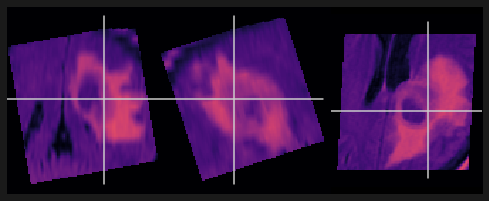

In [20]:
plot_anat(img, cmap='magma', colorbar=False, display_mode='ortho', annotate=False);

In [99]:
e=np.asarray(img.dataobj)
e.shape

(110, 110, 110)

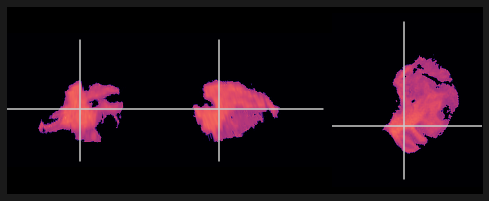

In [100]:
plot_anat(img, cmap='magma', colorbar=False, display_mode='ortho', annotate=False);

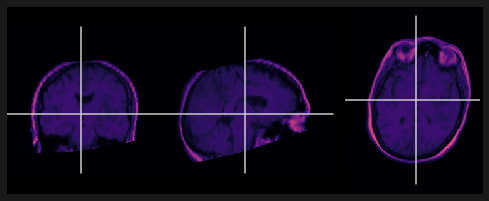

In [5]:
plot_anat(IMG_reg, cmap='magma', colorbar=False, display_mode='ortho', annotate=False);

# PROVA CUBETTI


In [68]:
IMG_reg = nb.load(f"{datasetDir}/ANGELONI_GIUSEPPINA/FLAIR_registered.nii")

IMG_roi=nb.load(f"{datasetDir}/ANGELONI_GIUSEPPINA/ROI/T2ROI.nii")

In [69]:
img=np.asarray(IMG_reg.dataobj)
roi=np.asarray(IMG_roi.dataobj)
print(img.shape)
print(roi.shape)

(224, 256, 72)
(192, 192, 36)


In [70]:
conv=img*roi
conv.shape

ValueError: operands could not be broadcast together with shapes (224,256,72) (192,192,36) 

In [5]:
# mask: f"{datasetDir}/{Path}/ROI/{MaskPath}.nii.gz"
# sequence: f"{datasetDir}/{Path}/{SEQUENCE_1}.nii"
def BrainBox(Mask_file, Sequence_file):
    
    mask_data = nb.load(Mask_file)
    Mask = mask_data.dataobj
    
    r = np.any(Mask, axis=(1, 2))
    c = np.any(Mask, axis=(0, 2))
    z = np.any(Mask, axis=(0, 1))

    rmin, rmax = np.where(r)[0][[0, -1]]
    cmin, cmax = np.where(c)[0][[0, -1]]
    zmin, zmax = np.where(z)[0][[0, -1]]
    
    #f"{Path}"
    #for i in range(3):
    #    if Mask.shape[i]==Sequence.shape[i] :
    #    print("All Elements in List are Equal")
    #else:        
    #    print(f"All Elements in {Path} are Not Equal")
    
    delta_r=rmax-rmin
    delta_c=cmax-cmin
    delta_z=zmax-zmin
    delta_max=np.amax([delta_r,delta_c,delta_z])
    
    # Load bounding boxed image
    sequence_data = nb.load(Sequence_file)
    sequence=sequence_data.dataobj
    s=sequence[(rmin):(rmin+delta_max),(cmin):(cmin+delta_max),(zmin):(zmin+delta_max)]
    
    # Apply bounding box
    return s
    
    # Sequence=np.asarray(sequence_data.get_fdata())
    # Dim=[Sequence.shape]

    # BrainBox_Sequence=Sequence[(rmin):((rmin)+delta_max),(cmin):((cmin)+delta_max),(zmin):((zmin)+delta_max)]
    # return BrainBox_Sequence

In [6]:
box=BrainBox(f"{datasetDir}/ANGELONI_GIUSEPPINA/ROI/T2ROI.nii",f"{datasetDir}/ANGELONI_GIUSEPPINA/FLAIR_registered.nii")

In [63]:
float(box.shape[0])

56.0

In [55]:
import nibabel
box_nibabel = nibabel.Nifti1Image(box, affine=scale(32.0/56.0,32.0/56.0,32.0/20.0))

In [57]:
box_nibabel.dataobj.shape

(56, 56, 20)

In [44]:
box_nibabel.affine

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [45]:
def scale(dx, dy, dz):
    return np.array([[dx, 0, 0, 0], [0, dy, 0, 0], [0, 0, dz, 0], [0, 0, 0, 1]])

In [50]:
box_shaped = nilearn.image.resample_img(box_nibabel, target_affine=scale(56.0/32.0,56.0/32.0,20.0/32.0),target_shape=(32,32,32) ,interpolation='nearest')


In [58]:
box_shaped = nilearn.image.resample_img(box_nibabel, target_affine=np.eye(4),target_shape=(32,32,32) ,interpolation='nearest')


In [59]:
box_shaped.dataobj.shape

(32, 32, 32)

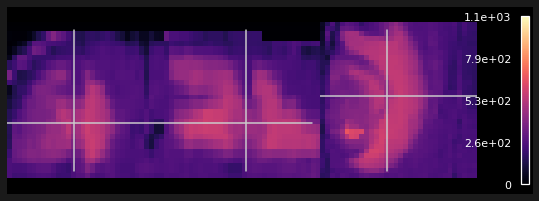

In [60]:
plot_anat(box_shaped, cmap='magma', colorbar=True, display_mode='ortho', annotate=False);

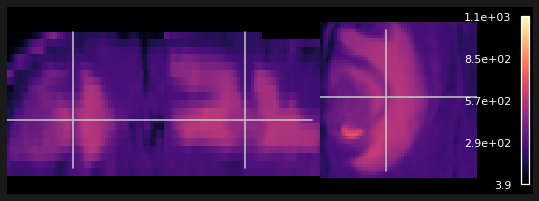

In [61]:
plot_anat(box_nibabel, cmap='magma', colorbar=True, display_mode='ortho', annotate=False);